# Networkx

# import

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# 1) Tracer un graph

In [2]:
G = nx.Graph()
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), ("C", "E")])


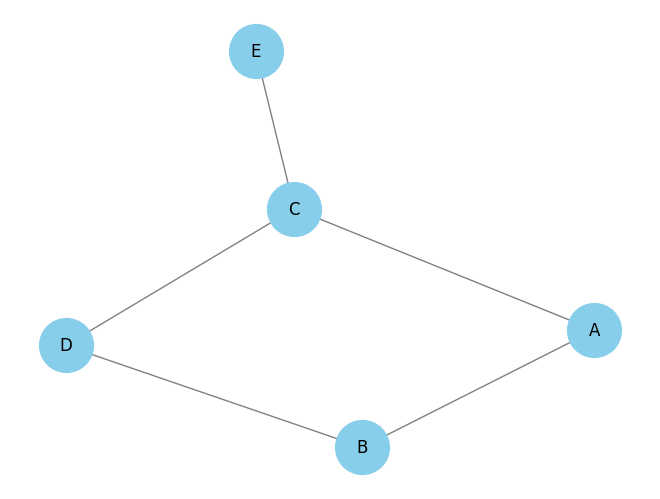

In [3]:
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500)


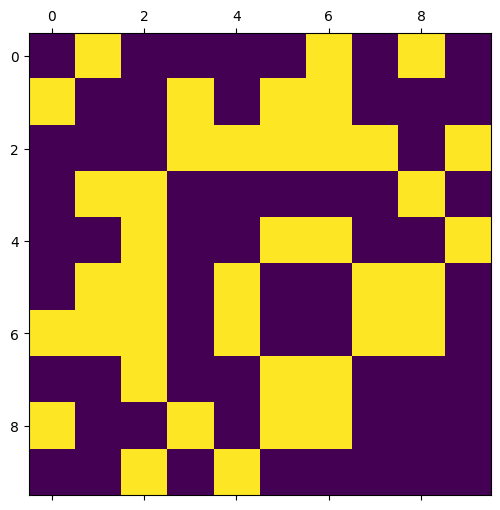

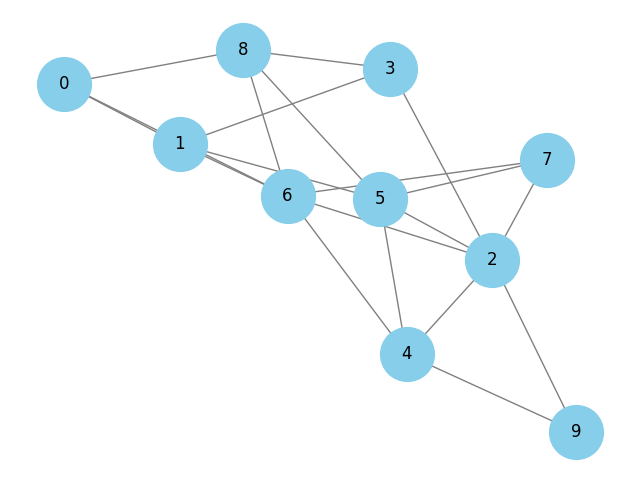

In [6]:
size = 10
adj_matrix = np.random.randint(0, 2, size=(size, size))

adj_matrix = np.triu(adj_matrix, 1)  # Mettre des zéros dans la partie inférieure
adj_matrix = adj_matrix + adj_matrix.T  # Symétriser

fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(adj_matrix)


G = nx.from_numpy_array(adj_matrix)

fig, ax = plt.subplots(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500)



# 2) Caractérisation graph

In [7]:
G = nx.Graph()
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), ("C", "E")])

print("Degrés:", dict(G.degree()))
print("Degré moyen:", np.mean([d for n, d in G.degree()]))
print("Centralité (degré):", nx.degree_centrality(G))
print("Clustering global:", nx.average_clustering(G))

Degrés: {'A': 2, 'B': 2, 'C': 3, 'D': 2, 'E': 1}
Degré moyen: 2.0
Centralité (degré): {'A': 0.5, 'B': 0.5, 'C': 0.75, 'D': 0.5, 'E': 0.25}
Clustering global: 0.0


# 3) karate club example

Text(0.5, 1.0, 'Karate Club Graph')

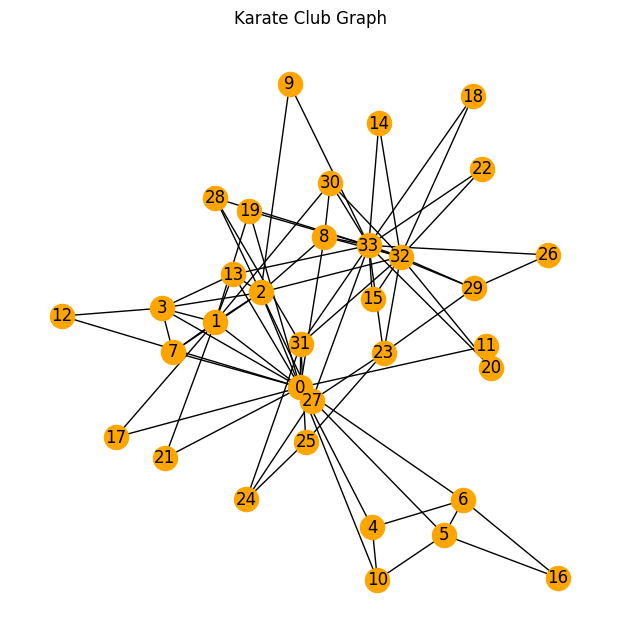

In [ ]:
karate = nx.karate_club_graph()
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw(karate, with_labels=True, node_color='orange')
ax.set_title("Karate Club Graph")


In [9]:
communities = nx.algorithms.community.greedy_modularity_communities(karate)
print("Nombre de communautés:", len(communities))

Nombre de communautés: 3


Text(0.5, 1.0, 'Communautés détectées')

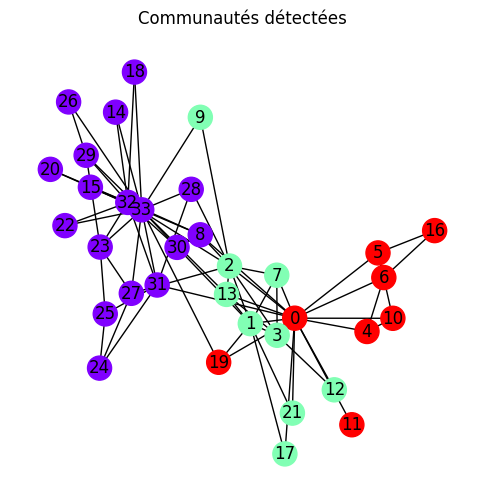

In [11]:
color_map = [0] * karate.number_of_nodes()
for i, comm in enumerate(communities):
    for node in comm:
        color_map[node] = i

fig, ax = plt.subplots(figsize=(6, 6))
nx.draw(karate, node_color=color_map, with_labels=True, cmap=plt.cm.rainbow)
ax.set_title("Communautés détectées")


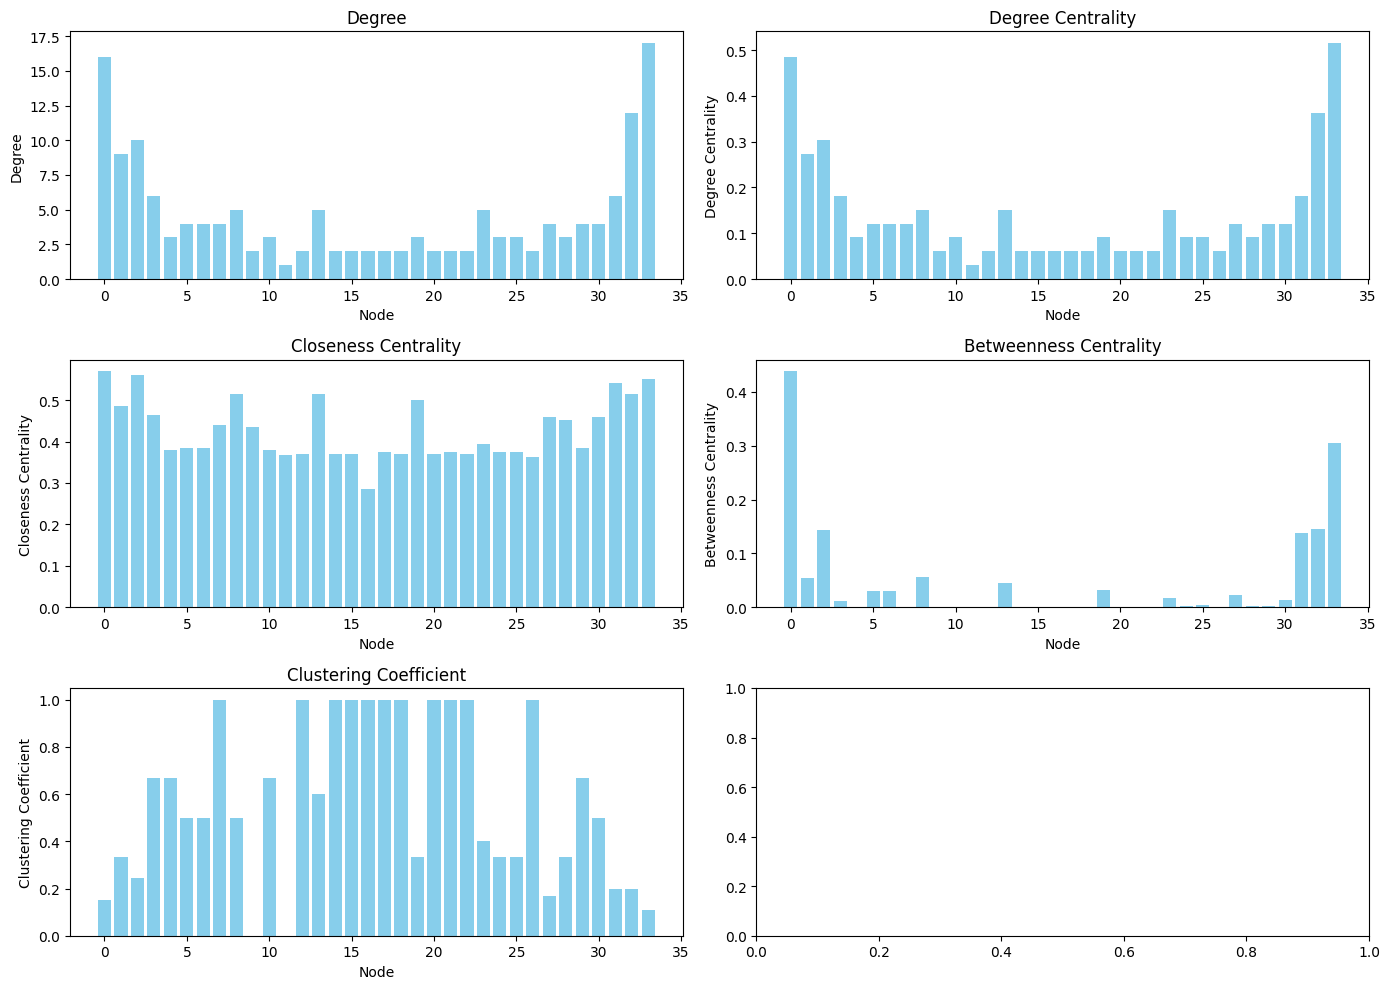

In [17]:

# Calcul des métriques
degree = dict(karate.degree())
degree_centrality = nx.degree_centrality(karate)
closeness_centrality = nx.closeness_centrality(karate)
betweenness_centrality = nx.betweenness_centrality(karate)
clustering = nx.clustering(karate)

# Affichage des métriques pour tous les noeuds
metrics = {
    'Degree': degree,
    'Degree Centrality': degree_centrality,
    'Closeness Centrality': closeness_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Clustering Coefficient': clustering
}

# Tracer les métriques
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# Mettre les données sous forme de liste de valeurs triées
sorted_metrics = {metric: sorted(values.items(), key=lambda x: x[1], reverse=True) for metric, values in metrics.items()}

# Tracer chaque métrique
for i, (metric, values) in enumerate(sorted_metrics.items()):
    ax = axs[i // 2, i % 2]
    nodes, values = zip(*values)
    ax.bar(nodes, values, color='skyblue')
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel("Node")

fig.tight_layout()

# 4) small world VS random

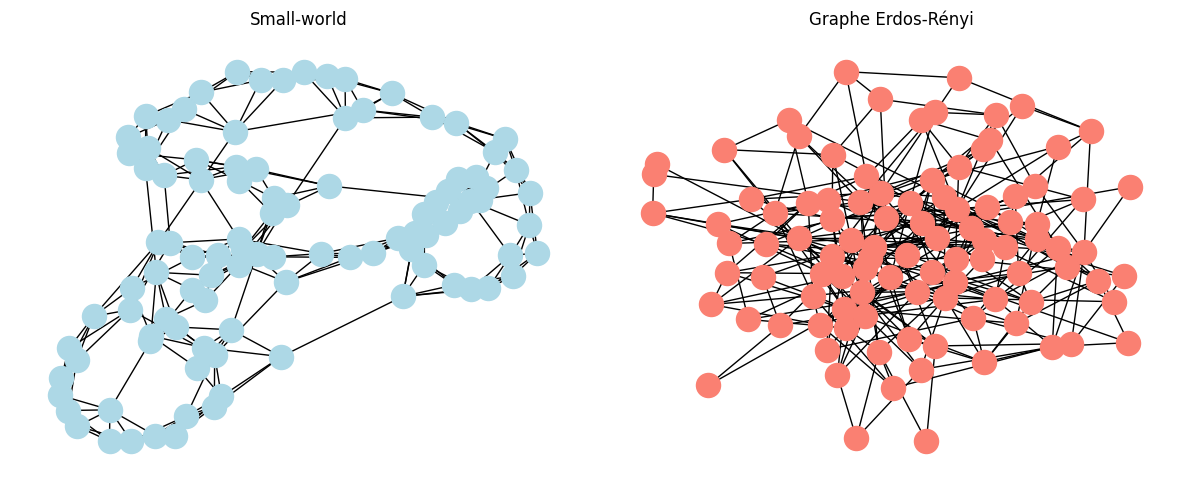

In [41]:
# Création des graphes
n = 100
k = 6
p = 0.05

small_world = nx.watts_strogatz_graph(n=n, k=k, p=p)
random_graph = nx.erdos_renyi_graph(n=n, p=k/(n-1))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

nx.draw(small_world, node_color='lightblue', with_labels=False, ax=ax[0])
ax[0].set_title("Small-world")

nx.draw(random_graph, node_color='salmon', with_labels=False, ax=ax[1])
ax[1].set_title("Graphe Erdos-Rényi")

fig.tight_layout()



In [19]:
def characterize_graph(G):
    clustering = nx.average_clustering(G)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan
    return clustering, path_length

cl_sw, pl_sw = characterize_graph(small_world)
cl_rand, pl_rand = characterize_graph(random_graph)

print("Small-World Graph:")
print(f"  Clustering: {cl_sw:.3f}, Avg Path Length: {pl_sw:.3f}")

print("\nRandom Graph:")
print(f"  Clustering: {cl_rand:.3f}, Avg Path Length: {pl_rand:.3f}")

Small-World Graph:
  Clustering: 0.534, Avg Path Length: 4.385

Random Graph:
  Clustering: 0.058, Avg Path Length: 2.666


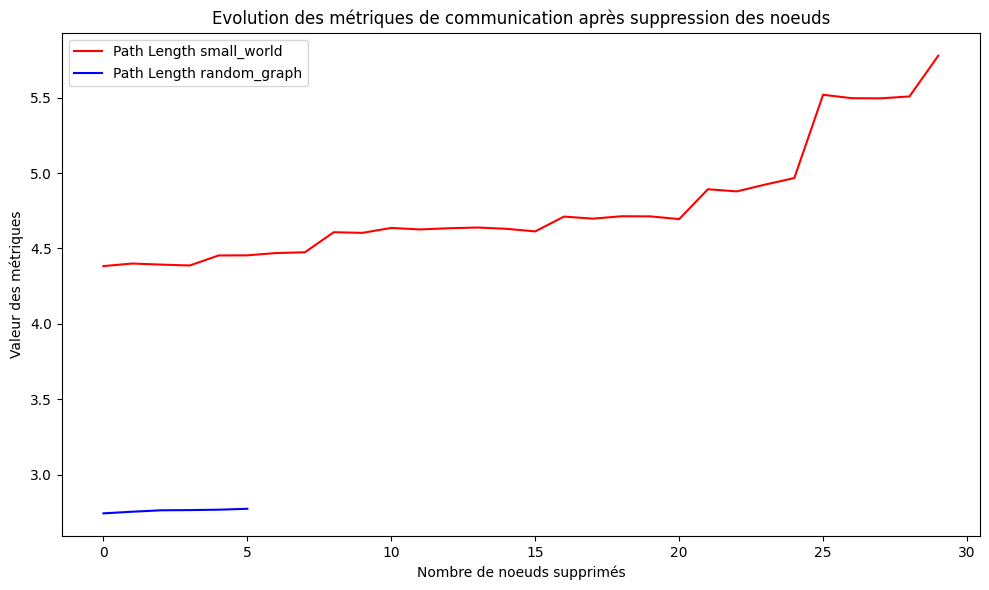

In [50]:
def remove_nodes(graph, num_iterations=30):

    path_length_values = []

    remaining_nodes = list(graph.nodes())
    graph_chunked = graph.copy()

    for _ in range(min(num_iterations, len(remaining_nodes))):

        node_to_remove = random.choice(remaining_nodes)
        remaining_nodes.remove(node_to_remove)
        graph_chunked.remove_node(node_to_remove)
        
        # Vérification si le graphe est toujours connecté pour calculer la path_length
        if nx.is_connected(graph_chunked):
            path_length = nx.average_shortest_path_length(graph_chunked)
        else:
            path_length = float('nan')  # Graphe déconnecté, on attribue NaN à la valeur

        path_length_values.append(path_length)

    return path_length_values

path_length_values_sw = remove_nodes(small_world, num_iterations=30)
path_length_values_rd = remove_nodes(random_graph, num_iterations=30)

fig, ax = plt.subplots(figsize=(10, 6))

# Tracer l'évolution de ces métriques
ax.plot(range(len(path_length_values_sw)), path_length_values_sw, label='Path Length small_world', color='r')
ax.plot(range(len(path_length_values_rd)), path_length_values_rd, label='Path Length random_graph', color='b')
ax.set_title("Evolution des métriques de communication après suppression des noeuds")
ax.set_xlabel("Nombre de noeuds supprimés")
ax.set_ylabel("Valeur des métriques")
ax.legend()
fig.tight_layout()


